In [1]:
import pyart
import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.colors import ListedColormap
import matplotlib.patheffects as pe
import json
from utils import wescon_kml_grid


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
radar_name = 'ncas-mobile-x-band-radar-2'

In [3]:
outer_lines, h_lines, v_lines, storm_boxes, labels = wescon_kml_grid.read_kml('../doc.kml')

In [4]:
labels

{'South Wales': '-4.25,51.55,0',
 'Bristol Channel': '-4.2,51.05,0',
 'Dartmoor': '-4.3,50.55,0',
 'South Hams': '-4.25,50.05,0',
 'Lyme Bay': '-3.3,50.05,0',
 'Weymouth': '-2.3,50.05,0',
 1: '-3.55,50.60000000000001,0',
 2: '-3.55,50.8,0',
 3: '-3.55,51,0',
 4: '-3.55,51.2,0',
 5: '-3.55,51.4,0',
 6: '-3.55,51.6,0',
 'A': '-3.4,50.45,0',
 'B': '-3.2,50.45,0',
 'C': '-3,50.45,0',
 'D': '-2.8,50.45,0',
 'E': '-2.6,50.45,0',
 'F': '-2.4,50.45,0',
 'G': '-2.2,50.45,0',
 'H': '-2,50.45,0',
 'I': '-1.8,50.45,0',
 'J': '-1.6,50.45,0',
 'K': '-1.4,50.45,0',
 'L': '-1.2,50.45,0'}

In [5]:
with open('utils/var_scales.json') as f:
    var_scales = json.load(f)

<hr style="background-color:red;height:6px" />
<h3>PPI</h3>

In [6]:
radar_file = '/home/earjham/data/raw_data/ncas-mobile-x-band-radar-2/ncas-mobile-x-band-radar-2_chilbolton_20230427-100611_SUR_v1.nc'

In [7]:
radar = pyart.io.read(radar_file)

In [8]:
variable = 'dBZ'
vmin = var_scales[radar_name][variable]['min']
vmax = var_scales[radar_name][variable]['max']
num_colours = var_scales[radar_name][variable]['num_colours']
colourmap = var_scales[radar_name][variable]['colourmap']

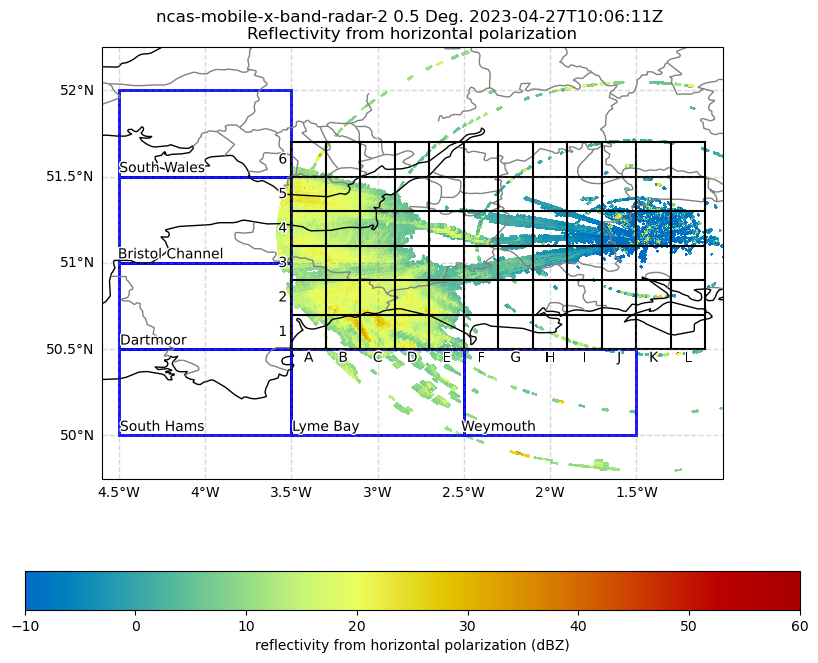

In [15]:
display = pyart.graph.RadarMapDisplay(radar)
for sweep in [0]:#range(radar.nsweeps):
    fig = plt.figure(figsize = (10,8))
    ax = plt.subplot(111, projection=ccrs.PlateCarree())
    display.plot_ppi_map(variable, ax=ax, resolution='10m', vmin=vmin, vmax=vmax, sweep=sweep, colorbar_orient='horizontal', cmap=colourmap)
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
                      draw_labels=True,
                      linewidth=1, 
                      color='gray', 
                      alpha=0.3,
                      linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    for i,l in enumerate(outer_lines):
        xs = [ float(l[0].split(' ')[0].split(',')[0]), float(l[0].split(' ')[1].split(',')[0]) ]
        ys = [ float(l[0].split(' ')[0].split(',')[1]), float(l[0].split(' ')[1].split(',')[1]) ]
        ax.add_artist(lines.Line2D(xs, ys, color='black'))
        #if i == 1:  # left line of box
        #    txt = mpl.text.Text(x = -3.42, y = 50.4, text="A")
        #    txt.set_path_effects([pe.withStroke(linewidth=2, foreground='w')])
        #    ax.add_artist(txt)
        #elif i == 0:  # top line of box
        #    txt = mpl.text.Text(x = -3.6, y = 51.375, text="5")
        #    txt.set_path_effects([pe.withStroke(linewidth=2, foreground='w')])
        #    ax.add_artist(txt)
    for i,l in enumerate(h_lines):
        xs = [ float(l[0].split(' ')[0].split(',')[0]), float(l[0].split(' ')[1].split(',')[0]) ]
        ys = [ float(l[0].split(' ')[0].split(',')[1]), float(l[0].split(' ')[1].split(',')[1]) ]
        ax.add_artist(lines.Line2D(xs, ys, color='black'))
        #label_loc_x = min(xs) - 0.1
        #label_loc_y = ys[0] - 0.125
        #txt = mpl.text.Text(x=label_loc_x, y = label_loc_y, text=(i+1))
        #txt.set_path_effects([pe.withStroke(linewidth=2, foreground='w')])
        #ax.add_artist(txt)
    for i,l in enumerate(v_lines):
        xs = [ float(l[0].split(' ')[0].split(',')[0]), float(l[0].split(' ')[1].split(',')[0]) ]
        ys = [ float(l[0].split(' ')[0].split(',')[1]), float(l[0].split(' ')[1].split(',')[1]) ]
        ax.add_artist(lines.Line2D(xs, ys, color='black'))
        #label_loc_x = xs[0] + 0.08
        #label_loc_y = min(ys) - 0.1
        #txt = mpl.text.Text(x=label_loc_x, y = label_loc_y, text=chr(ord("@")+(i+2)))
        #txt.set_path_effects([pe.withStroke(linewidth=2, foreground='w')])
        #ax.add_artist(txt)
    #ax.add_artist(mpl.patches.Rectangle((-4.5,51.5),1,.5,facecolor="#FFFFFF",edgecolor="blue",linewidth=2))
    for i,l in enumerate(storm_boxes):
        xs = [ float(l[i].split(',')[0]) for i in range(len(l)) ]
        ys = [ float(l[i].split(',')[1]) for i in range(len(l)) ]
        xy = (min(xs),min(ys))
        width = max(xs) - min(xs)
        height = max(ys) - min(ys)
        ax.add_artist(mpl.patches.Rectangle(xy,width,height,facecolor="#FFFFFF00",edgecolor="blue",linewidth=2))
        #txt = mpl.text.Text(x=xy[0]+0.02,y=xy[1]+0.02,text=greek_letter_list[i])
        #txt.set_path_effects([pe.withStroke(linewidth=2, foreground='w')])
        #ax.add_artist(txt)
    for k,v in labels.items():
        x = float(str(v).split(",")[0])
        y = float(str(v).split(",")[1])
        txt = mpl.text.Text(x = x, y = y, text=k, horizontalalignment = 'center', verticalalignment = 'center')
        txt.set_path_effects([pe.withStroke(linewidth=2, foreground='w')])
        ax.add_artist(txt)
        
    plt.xlim([-4.6,-1])
    plt.ylim([49.75,52.25])
    plt.show()
    plt.close()

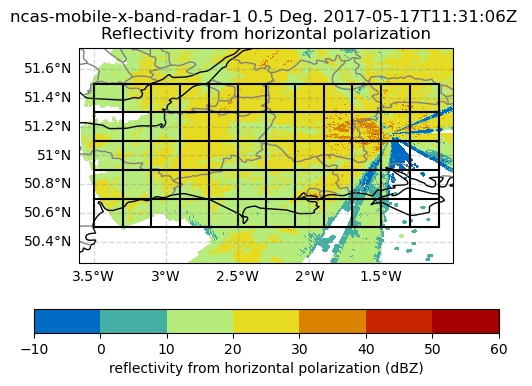

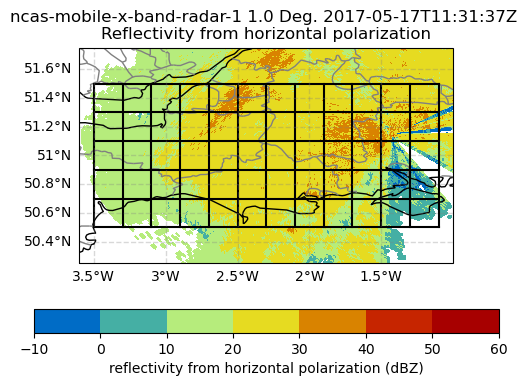

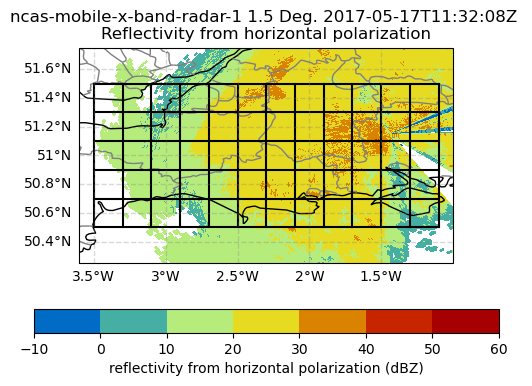

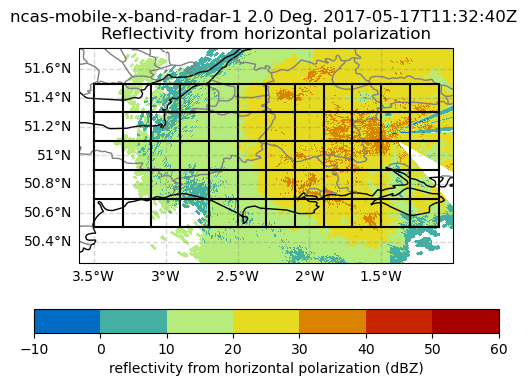

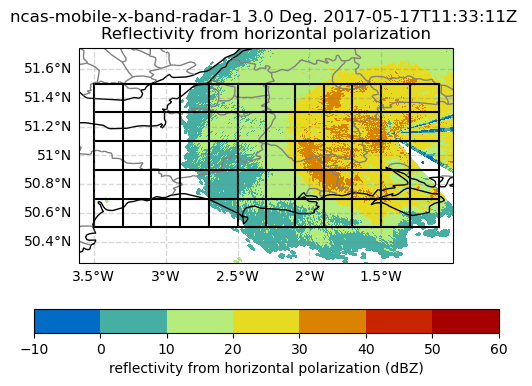

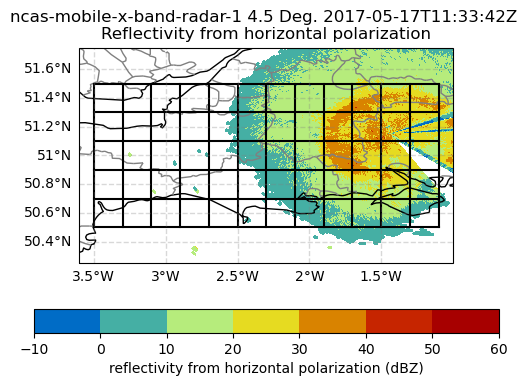

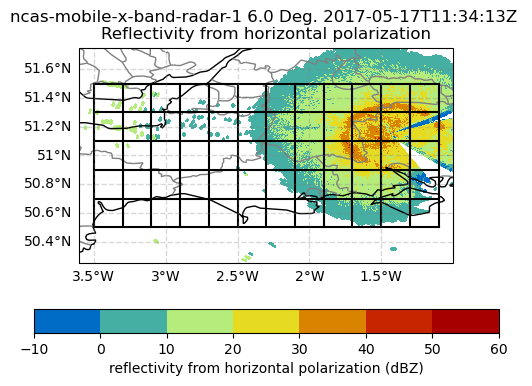

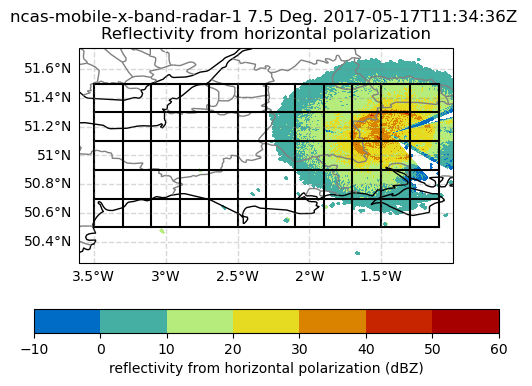

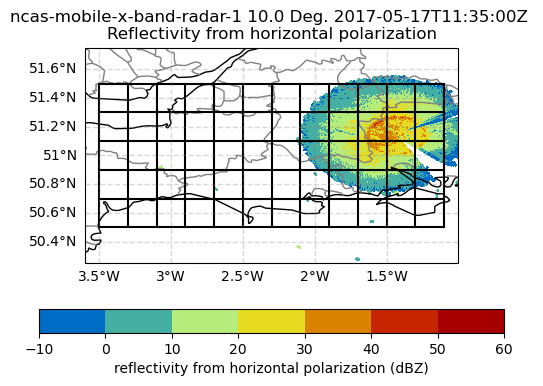

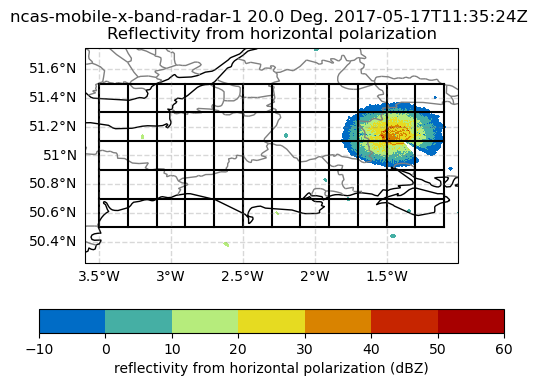

In [9]:
small_cmap = mpl.colormaps[colourmap].resampled(num_colours)
cmap = ListedColormap(small_cmap(range(num_colours)))

display = pyart.graph.RadarMapDisplay(radar)
for sweep in range(radar.nsweeps):
    fig = plt.figure(figsize = (6,4))
    ax = plt.subplot(111, projection=ccrs.PlateCarree())
    display.plot_ppi_map(variable, ax=ax, resolution='10m', vmin=vmin, vmax=vmax, sweep=sweep, colorbar_orient='horizontal', cmap=cmap)
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
                      draw_labels=True,
                      linewidth=1, 
                      color='gray', 
                      alpha=0.3,
                      linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    for l in outer_lines:
        xs = [ float(l[0].split(',')[0]), float(l[1].split(',')[0]) ]
        ys = [ float(l[0].split(',')[1]), float(l[1].split(',')[1]) ]
        ax.add_artist(lines.Line2D(xs, ys, color='black'))
    for l in h_lines:
        xs = [ float(l[0].split(',')[0]), float(l[1].split(',')[0]) ]
        ys = [ float(l[0].split(',')[1]), float(l[1].split(',')[1]) ]
        ax.add_artist(lines.Line2D(xs, ys, color='black'))
    for l in v_lines:
        xs = [ float(l[0].split(',')[0]), float(l[1].split(',')[0]) ]
        ys = [ float(l[0].split(',')[1]), float(l[1].split(',')[1]) ]
        ax.add_artist(lines.Line2D(xs, ys, color='black'))
    plt.xlim([-3.6,-1])
    plt.ylim([50.25,51.75])
    plt.show()
    plt.close()

<hr style="background-color:red;height:6px" />
<h3>RHI</h3>

In [10]:
radar_file = '/gws/nopw/j04/ncas_radar_vol2/data/xband/chilbolton/cfradial/calib_v2/rhi/20170517/ncas-mobile-x-band-radar-1_chilbolton_20170517-113654_RHI_v1.nc'

In [11]:
radar = pyart.io.read(radar_file)

In [12]:
variable = 'dBZ'
vmin = var_scales[radar_name][variable]['min']
vmax = var_scales[radar_name][variable]['max']
num_colours = var_scales[radar_name][variable]['num_colours']
colourmap = var_scales[radar_name][variable]['colourmap']

/home/users/earjham/miniconda3/envs/plotkml/lib/python3.11/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


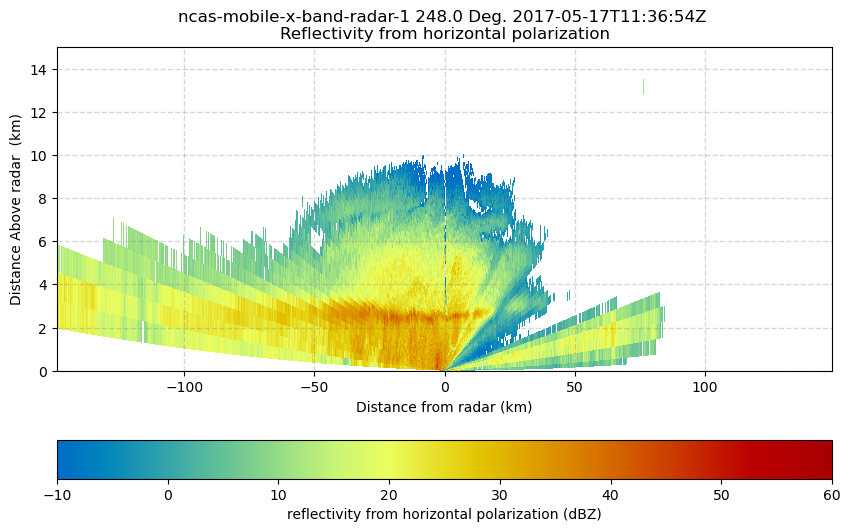

In [13]:
fig = plt.figure(figsize = (10,6))
ax = plt.subplot(111)
display = pyart.graph.RadarDisplay(radar)
display.plot_rhi(variable, ax=ax, vmin=vmin, vmax=vmax, colorbar_orient='horizontal', cmap=colourmap)
plt.grid(linewidth=1, color='gray', alpha=0.3, linestyle='--')
plt.ylim([0,15])
plt.show()

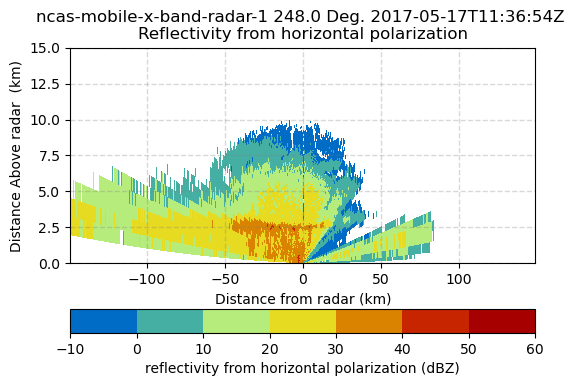

In [14]:
small_cmap = mpl.colormaps[colourmap].resampled(num_colours)
cmap = ListedColormap(small_cmap(range(num_colours)))

fig = plt.figure(figsize = (6,4))
ax = plt.subplot(111)
display = pyart.graph.RadarDisplay(radar)
display.plot_rhi(variable, ax=ax, vmin=vmin, vmax=vmax, cmap=cmap, colorbar_orient='horizontal')
plt.grid(linewidth=1, color='gray', alpha=0.3, linestyle='--')
plt.ylim([0,15])
plt.show()

Note (to myself mostly), cross section from south west ish (left) to north east ish (right)

In [16]:
radar.gate_latitude['data'].shape

(360, 993)

In [17]:
radar.fields['dBZ']['data'].shape

(360, 993)

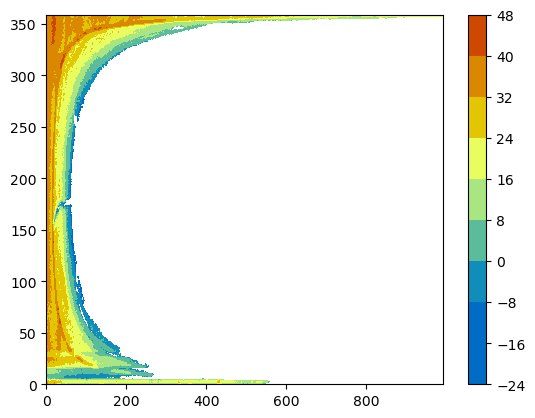

In [33]:
plt.contourf(radar.fields['dBZ']['data'], vmin=-10, vmax=60, cmap='pyart_HomeyerRainbow')
plt.colorbar();

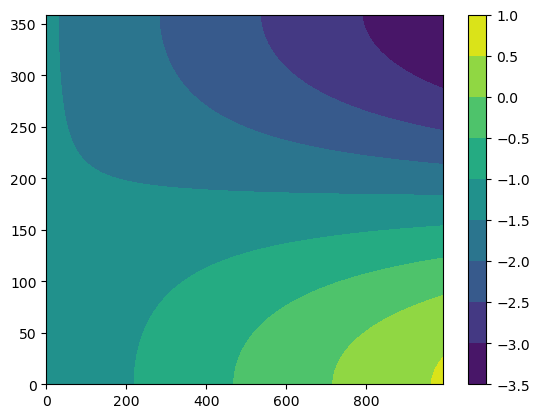

In [34]:
plt.contourf(radar.gate_longitude['data'])
plt.colorbar();